## HR_ANALYTICS
* 'Age'
* 'Attrition'
* 'BusinessTravel'
* 'DailyRate'
* 'Department'
* 'DistanceFromHome'
* 'Education'
* 'EducationField'
* 'EmployeeCount'
* 'EmployeeNumber'
* 'EnvironmentSatisfaction'
* 'Gender'
* 'HourlyRate'
* 'JobInvolvement'
* 'JobLevel'
* 'JobRole'
* 'JobSatisfaction'
* 'MaritalStatus'
* 'MonthlyIncome'
* 'MonthlyRate'
* 'NumCompaniesWorked'
* 'Over18'
* 'OverTime'
* 'PercentSalaryHike'
* 'PerformanceRating'
* 'RelationshipSatisfaction'
* 'StandardHours'
* 'StockOptionLevel'
* 'TotalWorkingYears'
* 'TrainingTimesLastYear'
* 'WorkLifeBalance'
* 'YearsAtCompany'
* 'YearsInCurrentRole'
* 'YearsSinceLastPromotion'
* 'YearsWithCurrManager'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)

In [3]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TotalWorkingYears have a large difference between the max vslue and 3rd quartile
* Monthly income varies from $1009 to $19999
* Minimum salary hike - 11
* Average YearsAtCompany - 5 years
* EmployeeCount and StandardHours are constant values - they have a standard deviation of 0 from mean

In [7]:
print(df.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
                          ..
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Length: 35, dtype: int64


No null values in the dataset

### EDA & VISUALIZATIONS

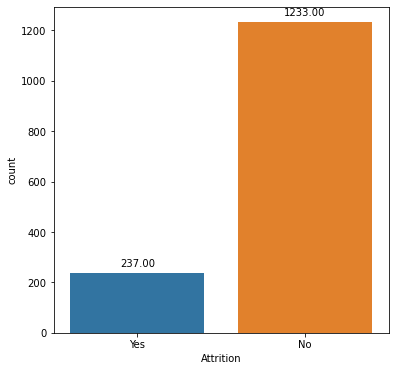

In [8]:
plt.figure(figsize=(6,6))
ax = sns.countplot(df['Attrition'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

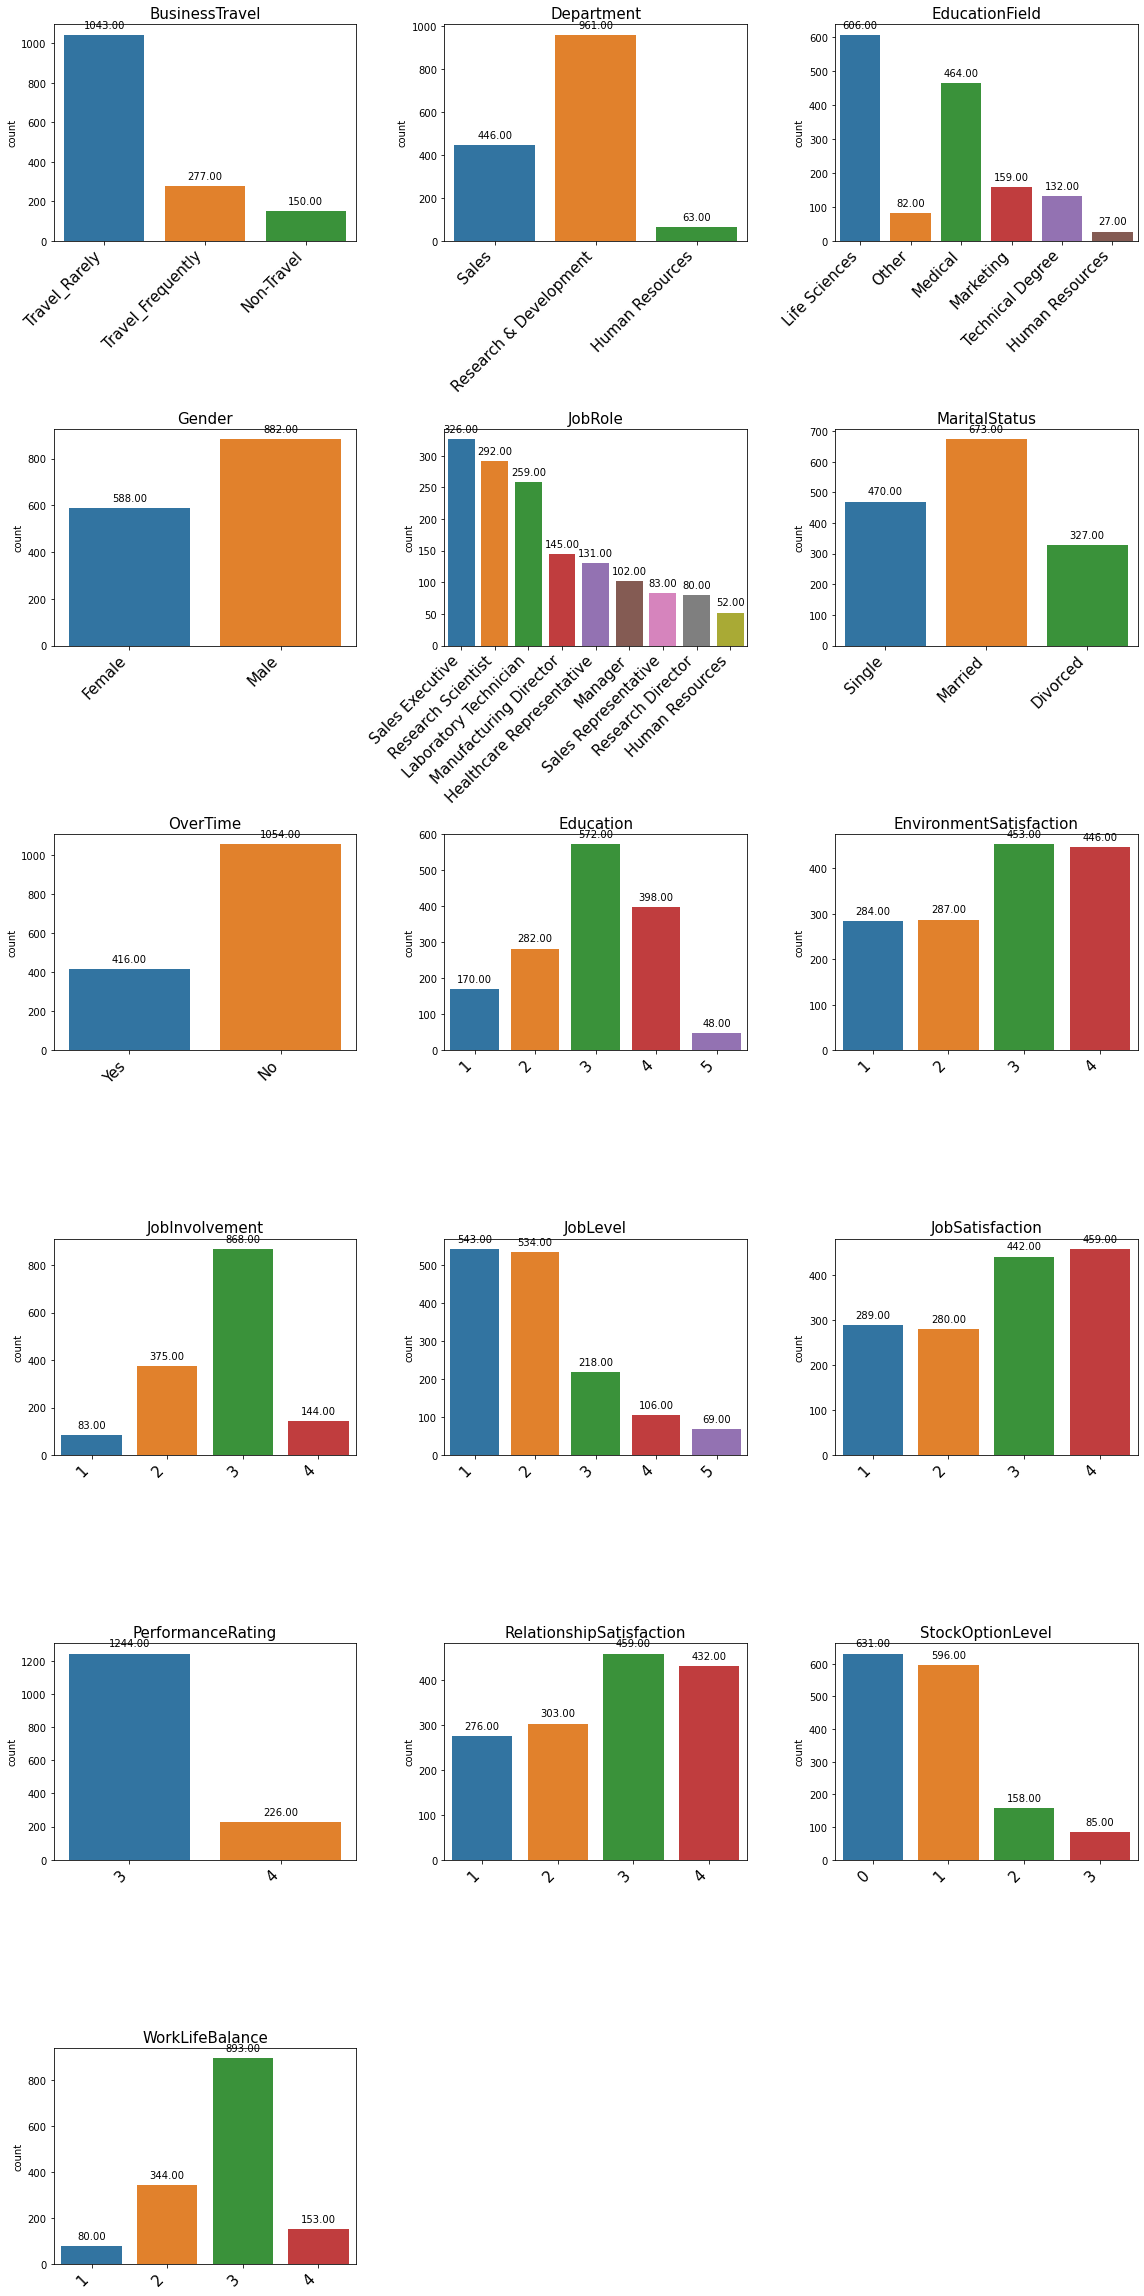

In [9]:
cat = [ 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
plt.figure(figsize=(16,32))

for i in range(len(cat)):
    plt.subplot(6,3,i+1)
    ax = sns.countplot(x=df[cat[i]])
    ax.set_title(cat[i],fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=15)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.tight_layout()

* Most employees travel rarely
* Most common job role - Sales Executive
* Most common Education Field of Employees - Life Sciences
* Most employees are married
* Every employee is Over18
* Majority of the people are satisfied with their environment, job and relationship

#### Comparing Attrition with the categorrical variables

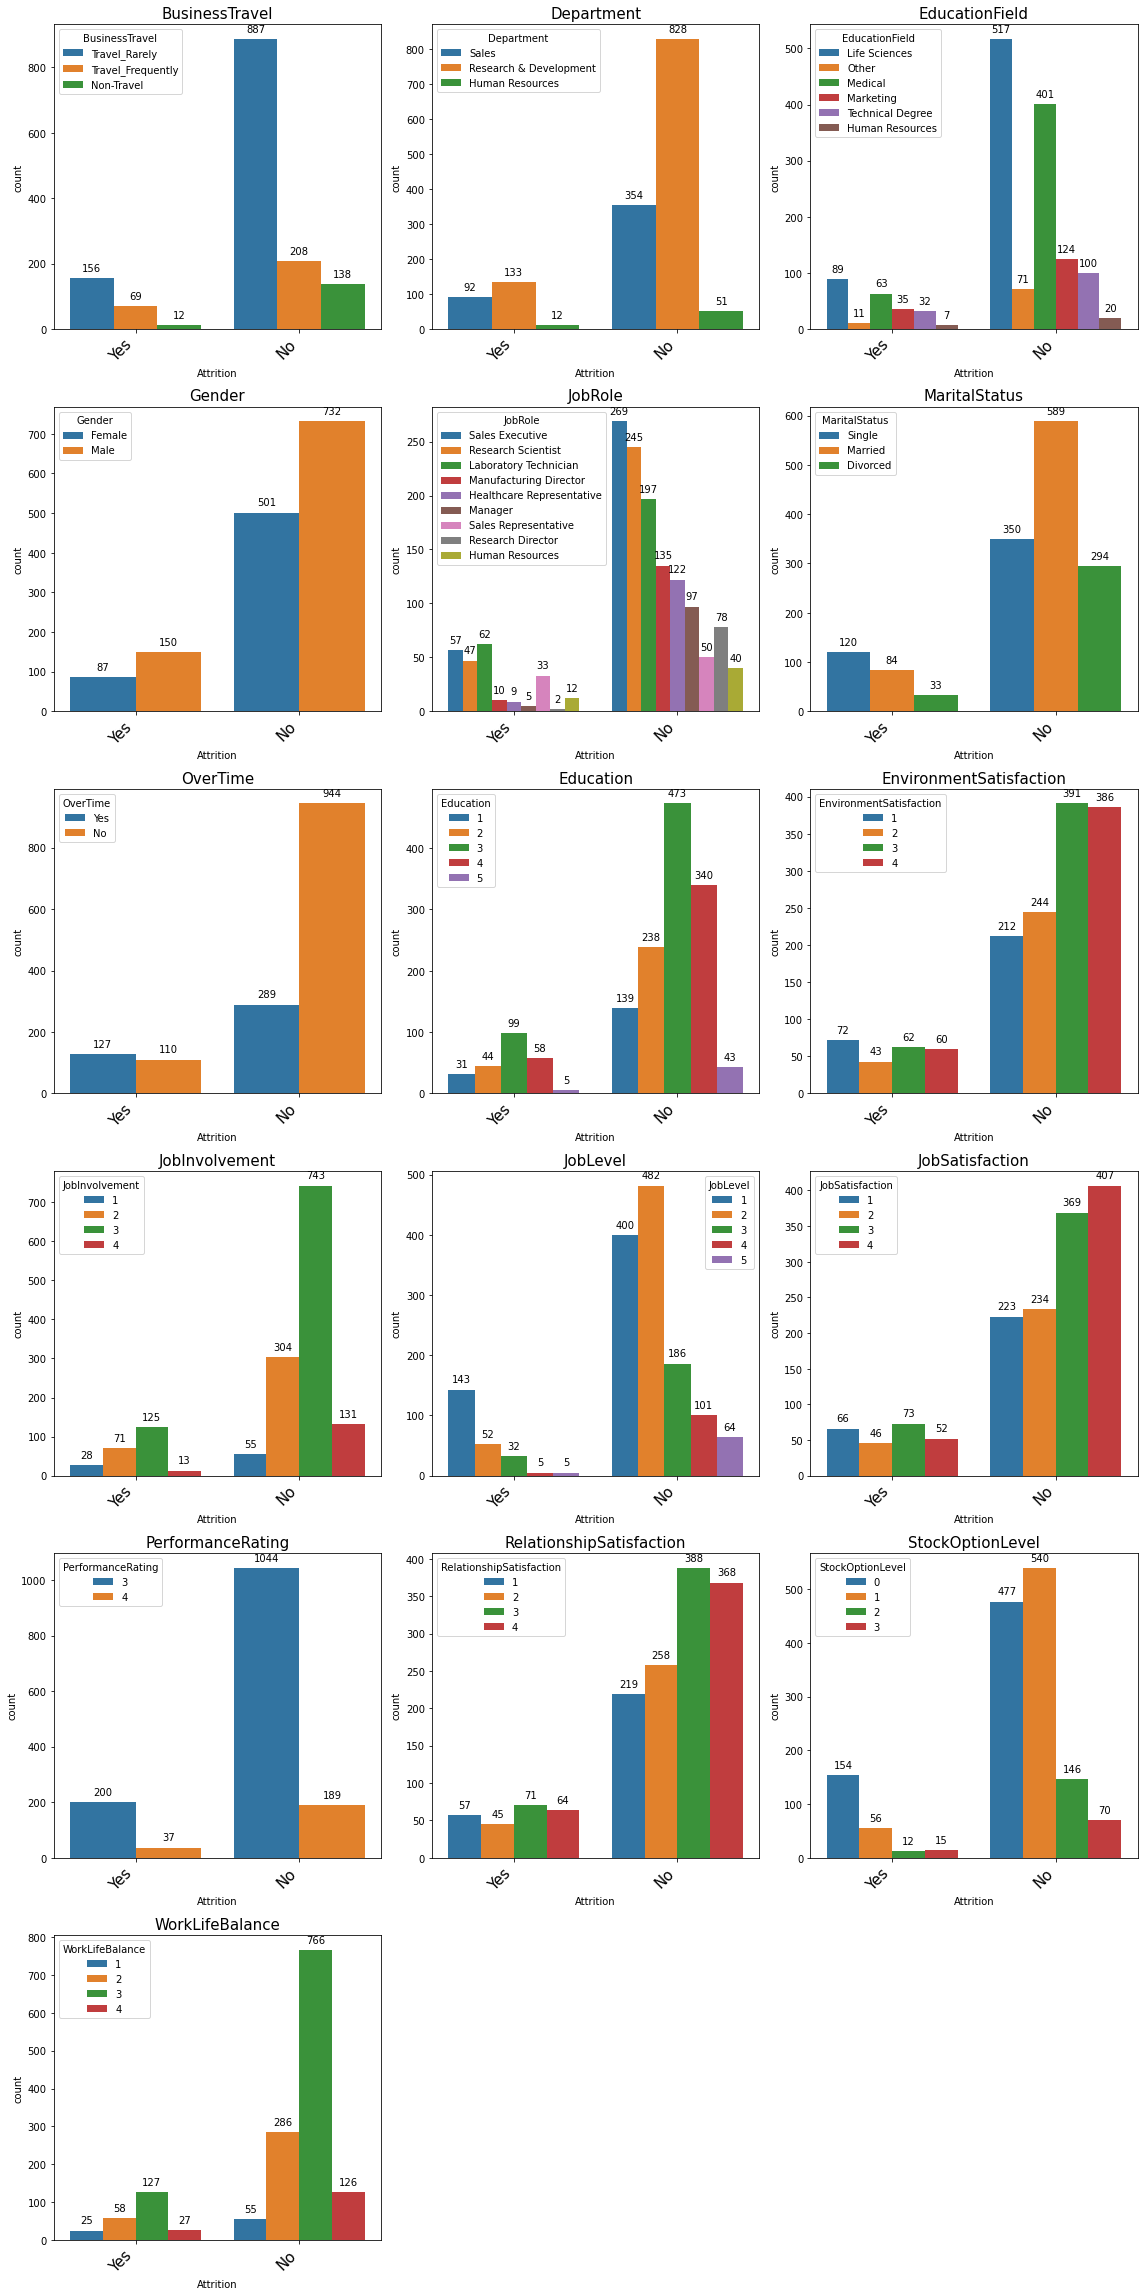

In [10]:
cat = [ 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
plt.figure(figsize=(16,32))

for i in range(len(cat)):
    plt.subplot(6,3,i+1)
    ax = sns.countplot(x = df['Attrition'],hue = df[cat[i]])
    ax.set_title(cat[i],fontsize=15)
#     ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=15)
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.tight_layout()

* Labrotary Technician is the most common job role of employees leaving the company
* A high percentage of Sales Representative have also left the company
* Only 2 Research Directors and 5 managers have left the company out of 80 and 102 respectively
* Majority of employees who left had worked overtime
* Most employees who left were Single
* People with lower Environment satisfaction have left the company
* People with good Relationship satisfaction have stayed in the company
* People with good Job satisfaction have stayed in the company
* People more involved in the job have stayed in the company

In [11]:
df['Education'].value_counts() 

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [12]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [13]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [14]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [15]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [16]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [17]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [18]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [19]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

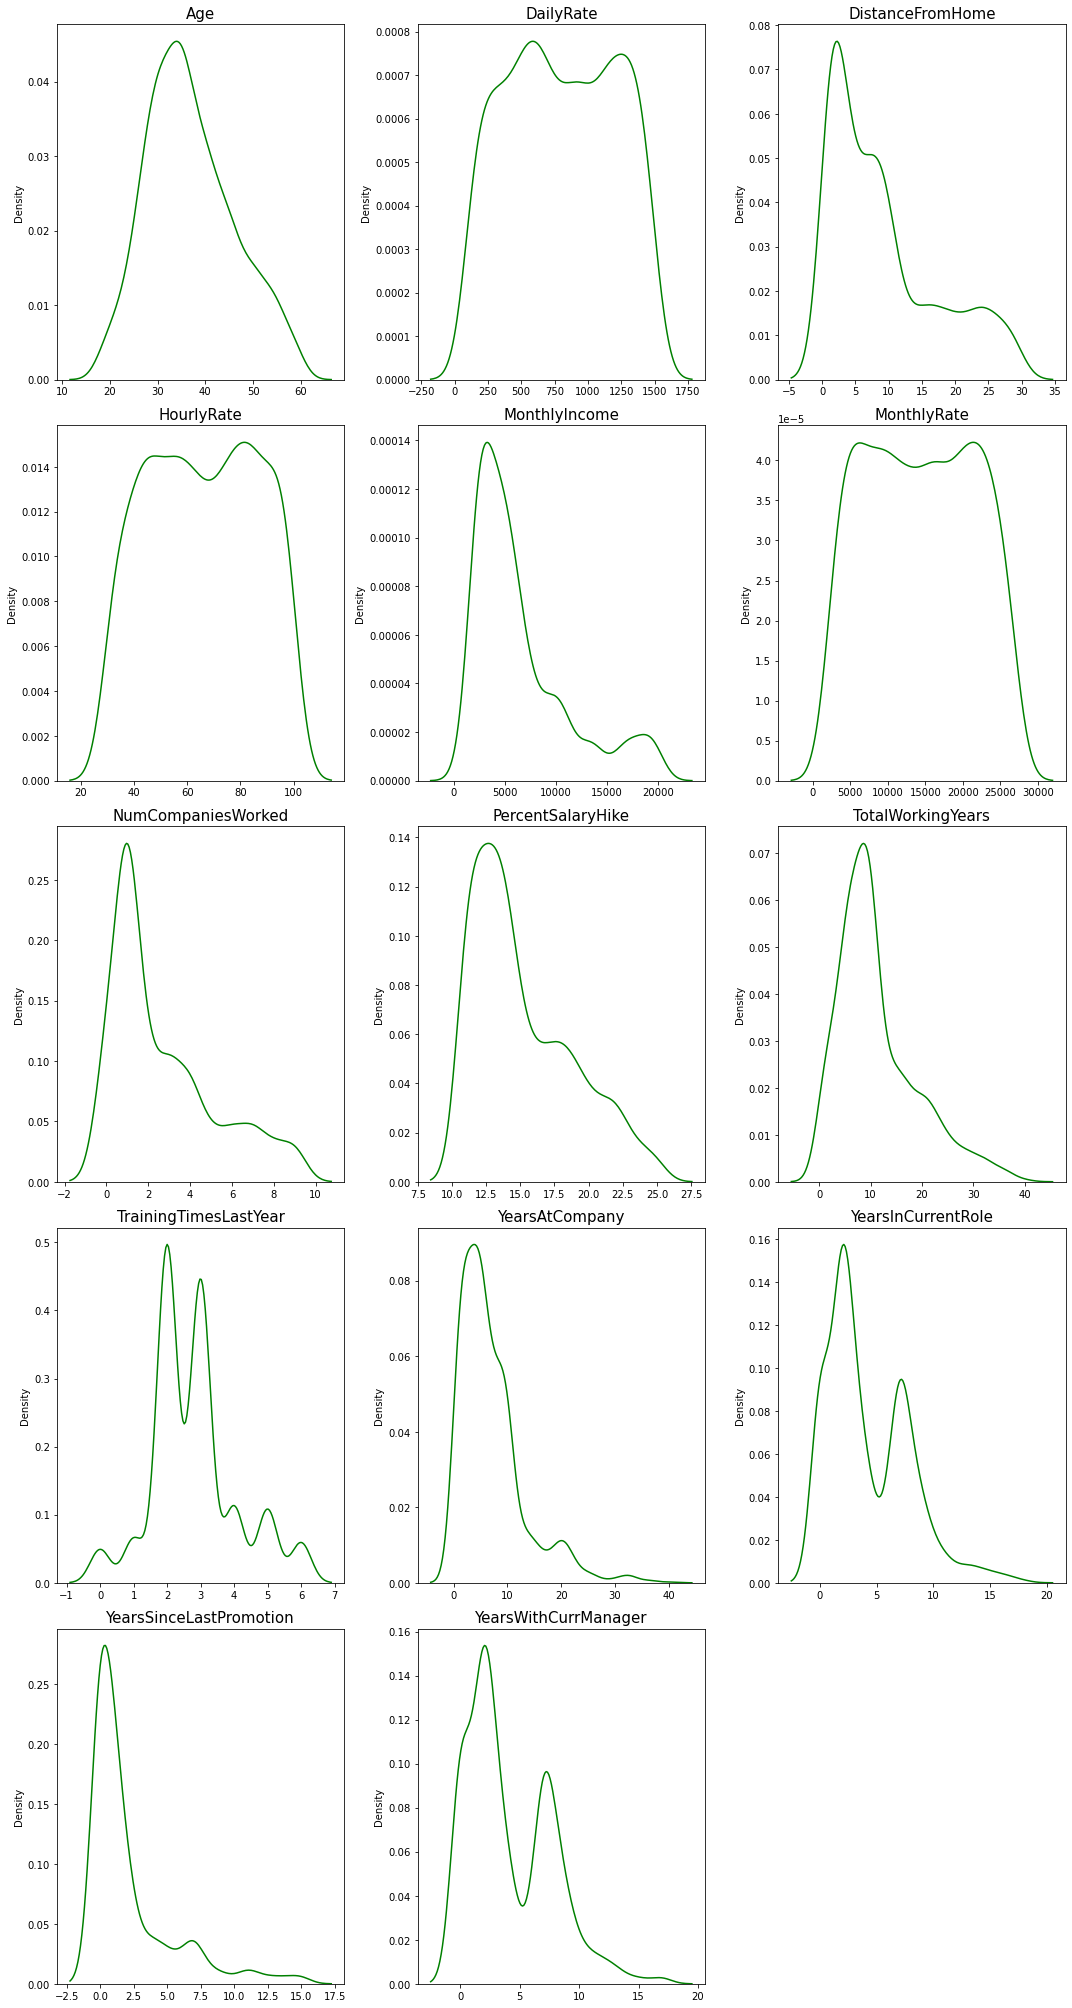

In [20]:
cont = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(15,28))

for i in range(len(cont)):
    plt.subplot(5,3,i+1)
    ax = sns.distplot(x=df[cont[i]], hist=False, color='green')
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel('')
    plt.tight_layout()


* DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, TotalWorkingYears - these columns are right skewed
* Many columns have multimodal distribution

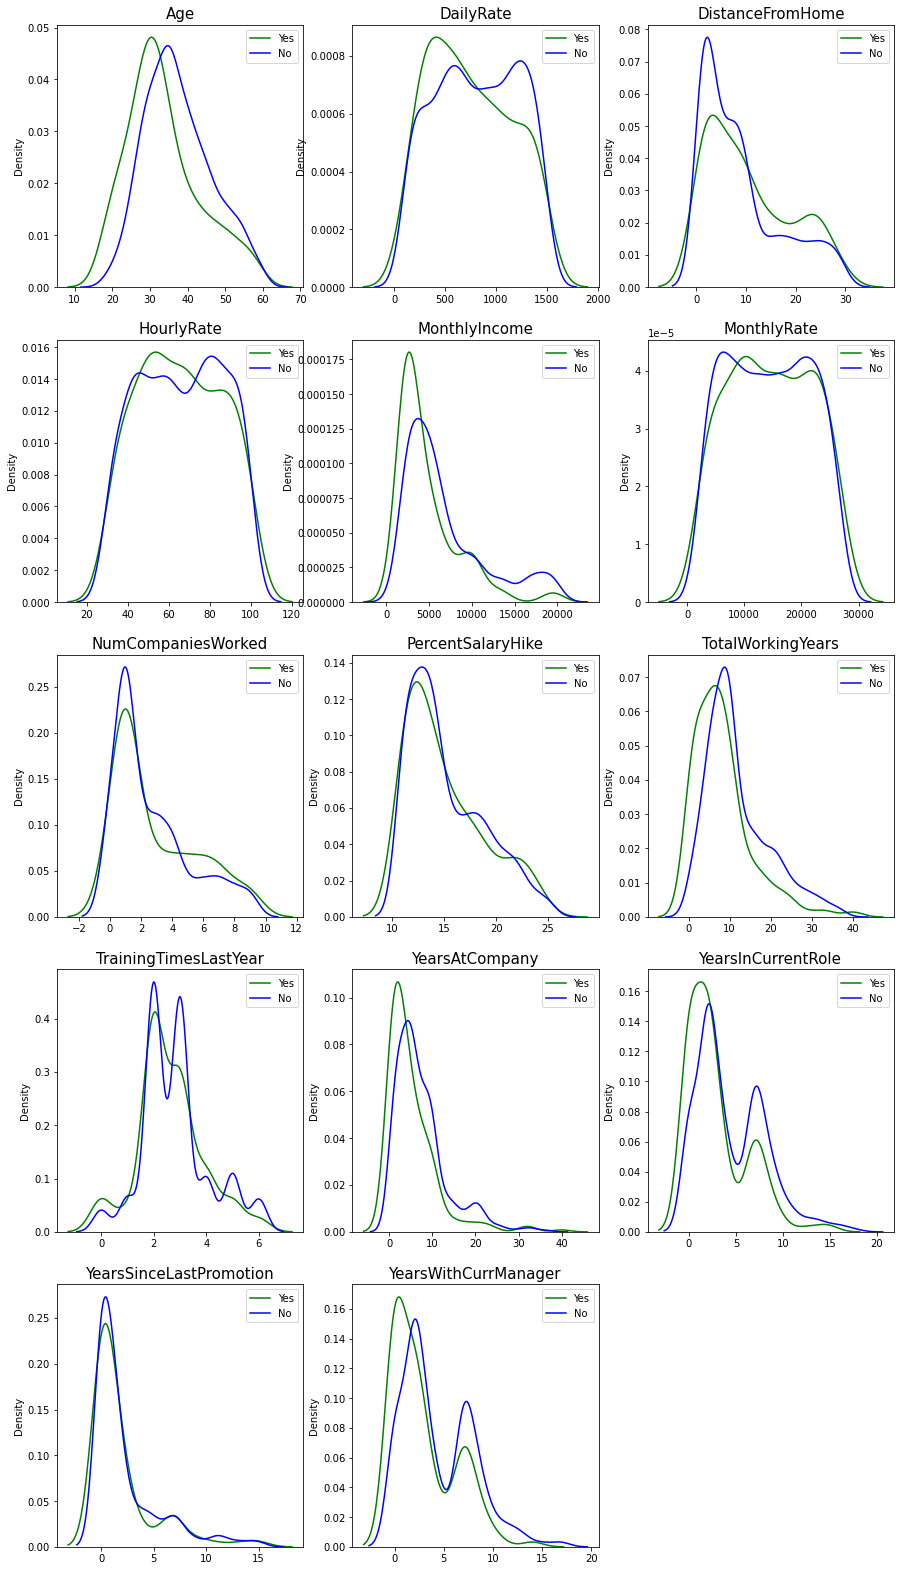

In [21]:
cont = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(15,28))

for i in range(len(cont)):
    plt.subplot(5,3,i+1)
    ax = sns.distplot(x=df[df['Attrition']=="Yes"][cont[i]], hist=False, color='green', label='Yes')
    ax = sns.distplot(x=df[df['Attrition']=="No"][cont[i]], hist=False, color='blue', label='No')
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel('')
    plt.legend()


In [22]:
cont.append('Attrition')
df_cont = df[cont]
df_cont_grp = df_cont.groupby('Attrition').mean()
df_cont_grp

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,2.645580,15.231144,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,2.940928,15.097046,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


* Younger people have left the company
* People with long distance from home have left the company
* People having lower monthly income have left the company

### LABEL ENCODING

In [23]:
label = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in label:
    df[col] = label_encoder.fit_transform(df[col])
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,4,1,79,3,1,2,4,2,3068,11864,0,Y,0,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,3,0,81,4,1,2,1,1,2670,9964,4,Y,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,4,1,67,3,1,2,3,0,2693,13335,1,Y,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,4,1,44,2,3,4,3,2,9526,8787,0,Y,0,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,3,1,94,3,2,0,3,1,5237,16577,6,Y,0,13,3,2,80,2,17,3,2,7,7,7,7


##### Dropping columns 'Over18', 'EmployeeCount', 'EmployeeNumber', 'StandarHours' since they have constant values

In [24]:
df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'],axis=1,inplace=True)
print(df.shape)
df.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

### OUTLIER REMOVAL

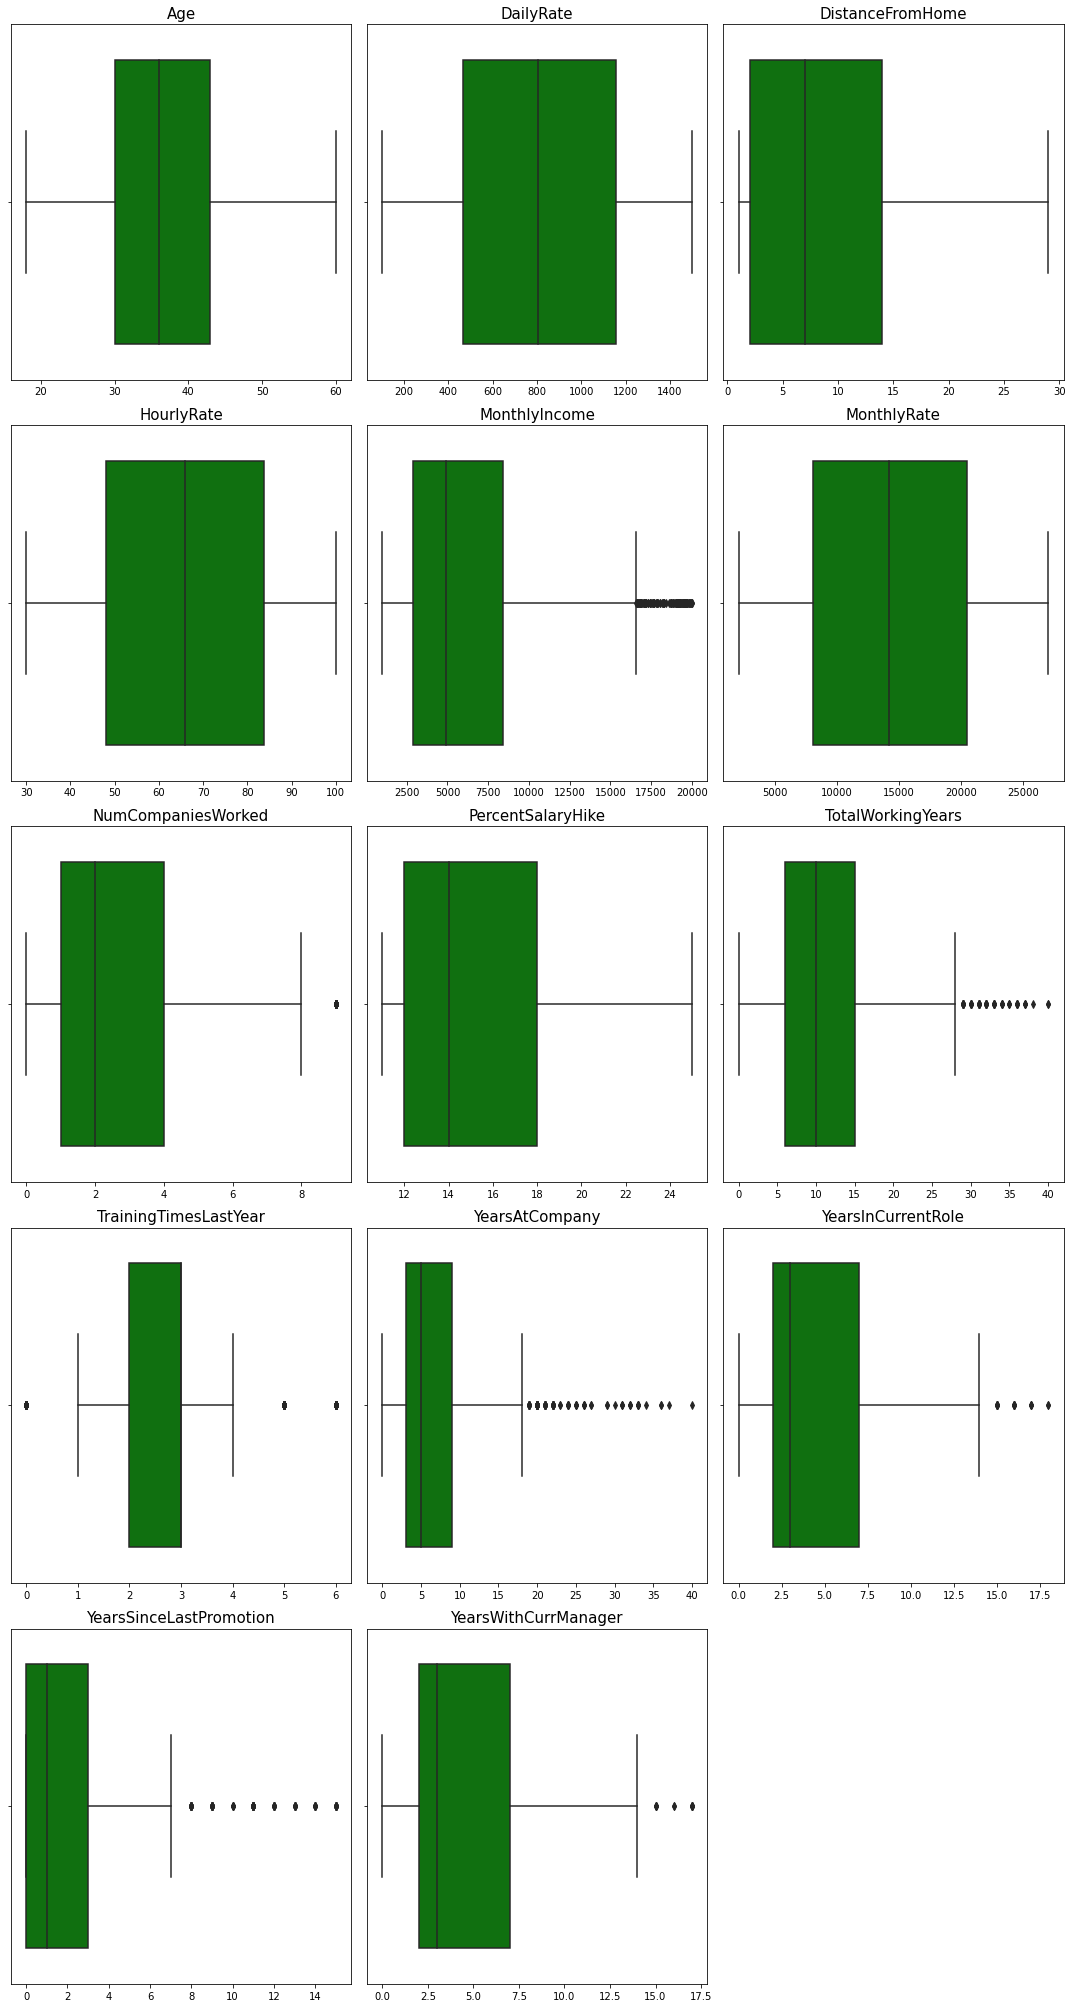

In [26]:
cont = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(15,28))

for i in range(len(cont)):
    plt.subplot(5,3,i+1)
    ax = sns.boxplot(x=df[cont[i]], orient='h', color='green')
    ax.set_title(cont[i],fontsize=15)
    ax.set_xlabel('')
    plt.tight_layout()

* Outliers are present in some columns.
* But those outliers are neccesary to predict attrition.
* For example, employee with high income may not decide to leave the company but his income may be an outlier and the record can get deleted.
* So we do not want to remove these ouliers

### CORRELATION

<AxesSubplot:>

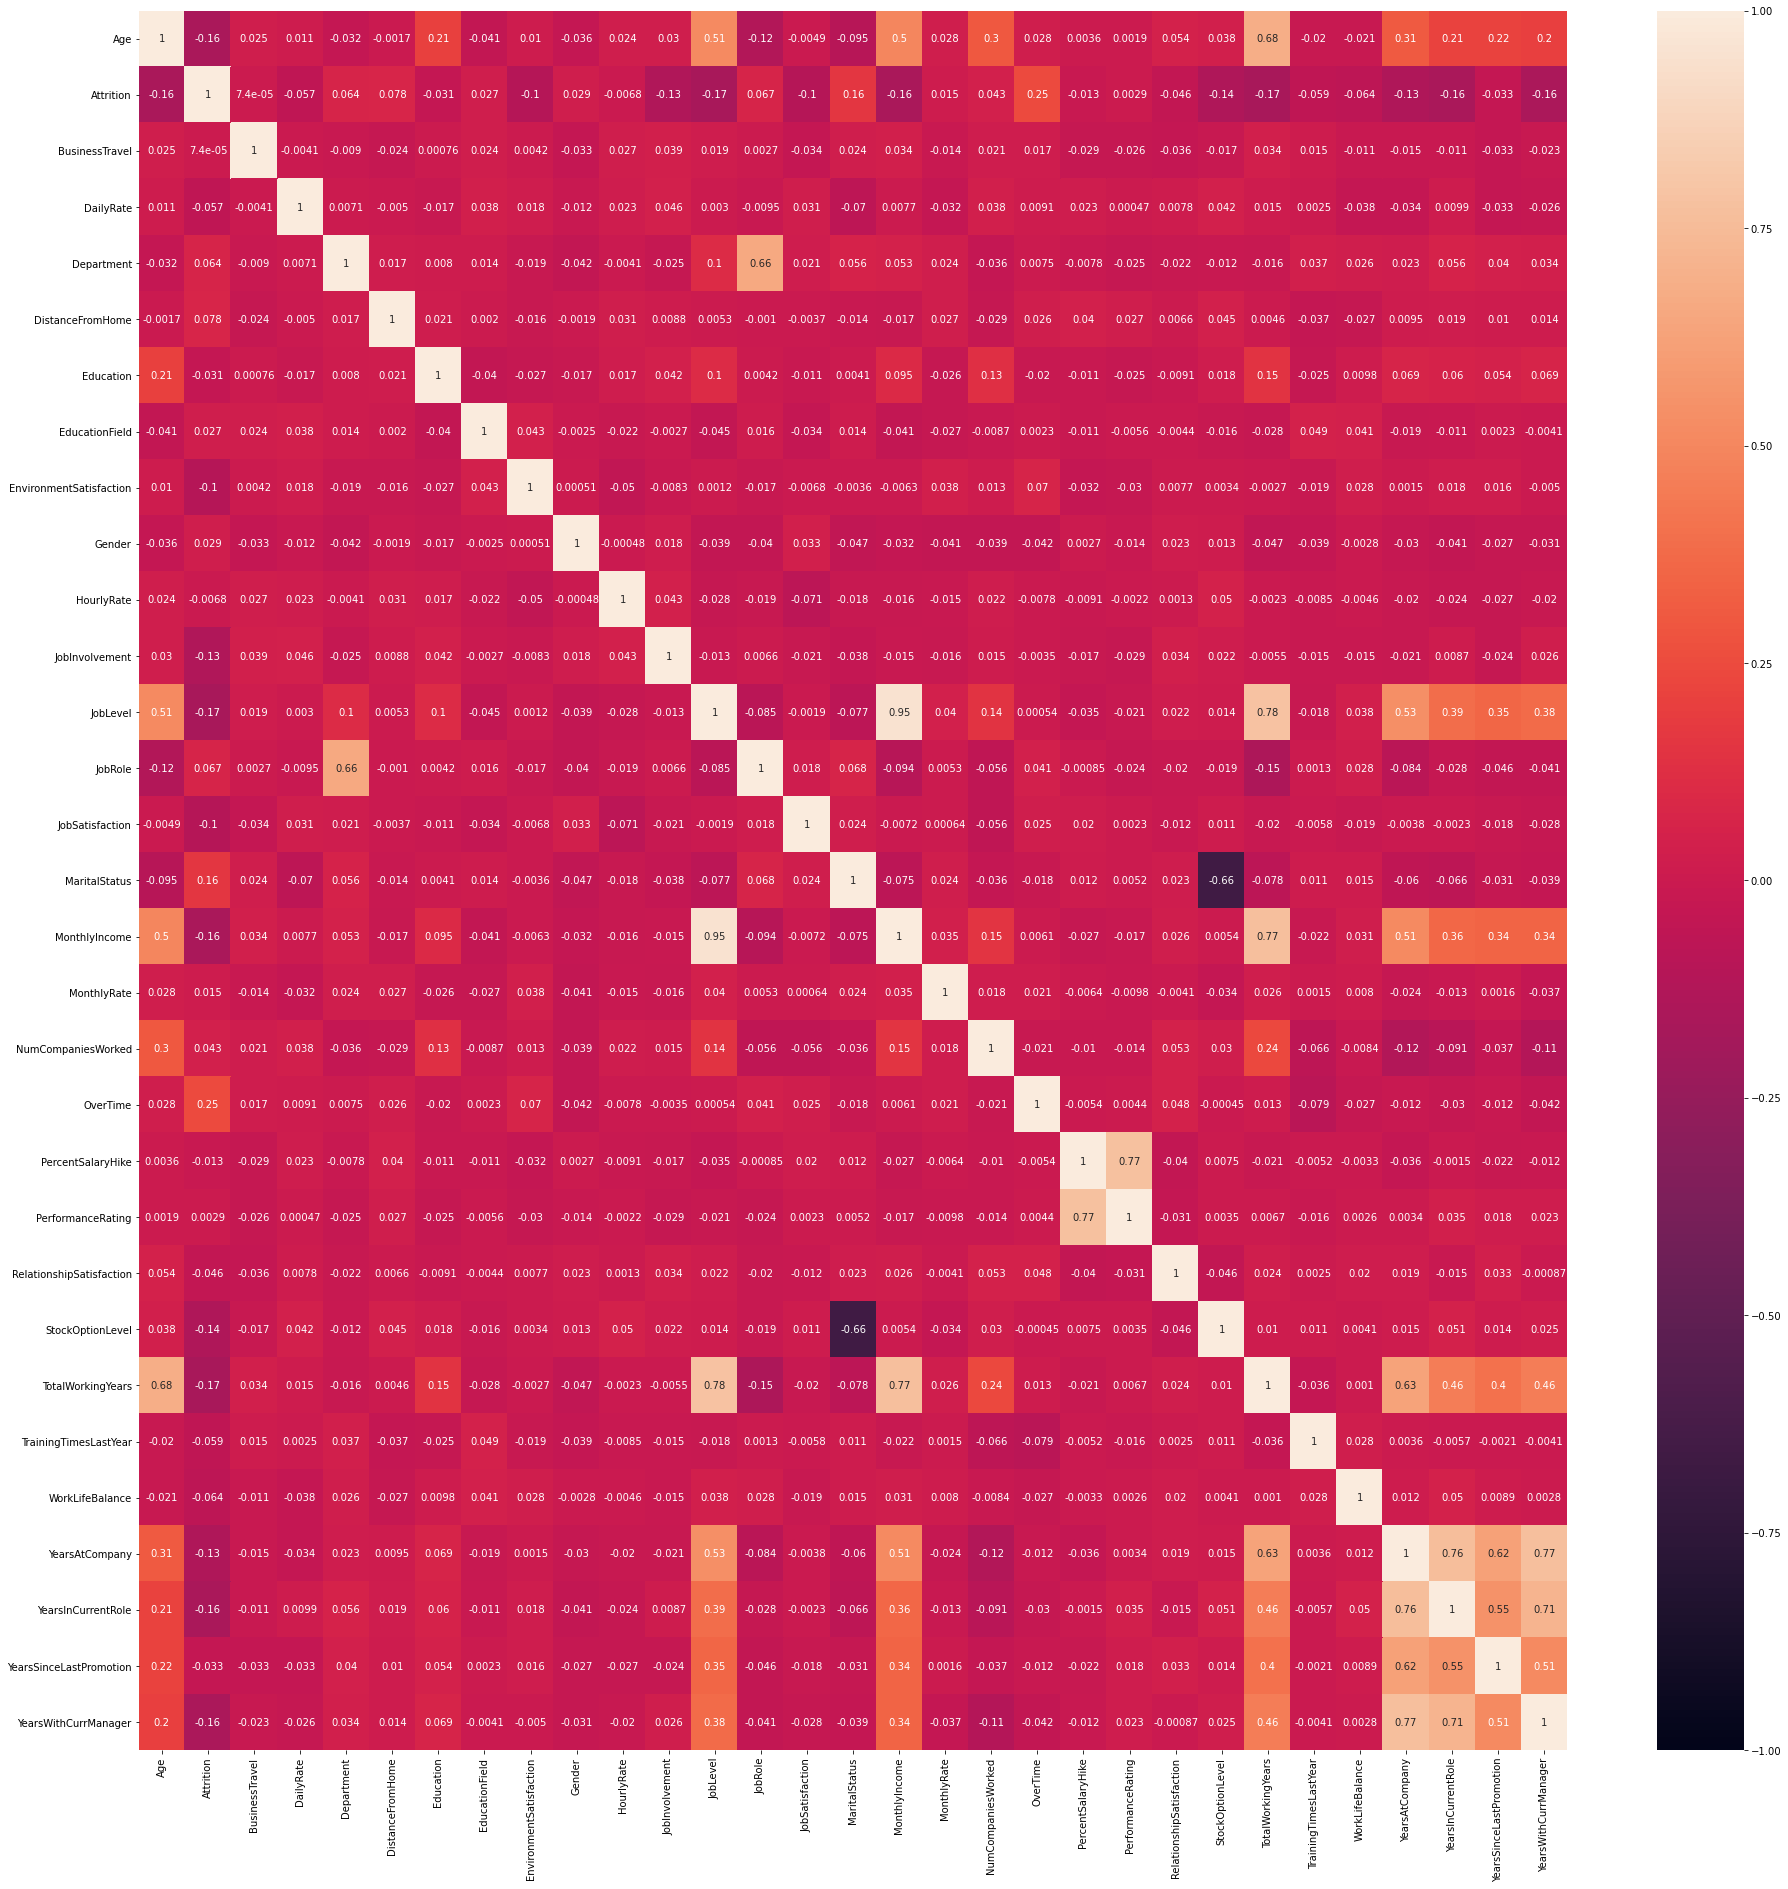

In [28]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

* Positive correlation with OverTime, MaritialStatus
* Significant Negative correlation with Job involvement, Monthly income, Job level, TotalWorkingYears

In [29]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

### SKEWNESS

In [30]:
pd.DataFrame(df[cont].skew())

,0
Age,0.413286
DailyRate,-0.003519
DistanceFromHome,0.958118
HourlyRate,-0.032311
MonthlyIncome,1.369817
MonthlyRate,0.018578
NumCompaniesWorked,1.026471
PercentSalaryHike,0.821128
TotalWorkingYears,1.117172
TrainingTimesLastYear,0.553124


Some columns are skewed, i.e. they have skewness more than the threshold(+/-0.5)

In [31]:
from sklearn.preprocessing import power_transform
x[cont] = power_transform(x[cont],method='yeo-johnson')

### MODEL DEVELOPMENT

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_c = sc.fit_transform(x)
x_c = pd.DataFrame(x_c)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression" : {'model':LogisticRegression(),
                             'params':{'penalty' :['l1', 'l2', 'elasticnet']
                                      },
                            },
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'max_depth':[5,8,50,100,150], 
                                 'min_samples_leaf':[2,3,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            }
}

In [35]:
max_scr = 0

for r_s in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=r_s,test_size=0.20)
    for i,j in models.items():
        j['model'].fit(x_train,y_train)
        pred_test = j['model'].predict(x_test)
        acc = accuracy_score(y_test,pred_test)
        if acc > max_scr:
            max_scr = acc
            best_model = j['model']
            best_r_s = r_s
print("Model : ",best_model)
print("Score : ",max_scr)
print("Random State : ",r_s)

Model :  LogisticRegression()
Score :  0.9217687074829932
Random State :  999


### LOGISTIC REGRESSION IS THE BEST MODEL WITH ACCURACY SCORE OF 0.91

In [36]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x_c,y,random_state=999,test_size=0.20)
grid = GridSearchCV(models['Logistic Regression']['model'], models['Logistic Regression']['params'], cv=4, scoring = 'accuracy')
grid.fit(x_train,y_train)
print({
    'model': 'Logistic Regression',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
    'best_params' : grid.best_params_
})

{'model': 'Logistic Regression', 'best_score': 0.9340497736158586, 'best_params': {'penalty': 'l2'}}


In [38]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
log_r = LogisticRegression(penalty = 'l2')
clf = log_r.fit(x_train,y_train)
y_pred = log_r.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification Report : ")
print(classification_report(y_test,y_pred))

Accuracy Score :  0.8673469387755102
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       246
           1       0.70      0.33      0.45        48

    accuracy                           0.87       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



In [39]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[239,  32],
       [  7,  16]], dtype=int64)

<AxesSubplot:>

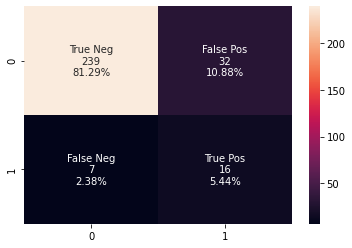

In [40]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [41]:
import joblib
joblib.dump(log_r,"log_reg_hr_attrition.pkl")

['log_reg_hr_attrition.pkl']